In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import pandas as pd
import numpy as np
import os
import glob

In [177]:
def preprocessing(input_path):
  all_input_list = sorted(glob.glob(input_path))
  train = pd.DataFrame()
  for datapath in all_input_list:
    data = pd.read_csv(datapath) # 이게 지금 28일치 * 24시
    data['obs_time'] = data.index % 24 # 시간통일
    print(data)
    data = abs(data)
    col_list = data.columns
    for i in range(0,len(col_list)):
      col = col_list[i]    
      if '누적' in col :
        data[col] = data.groupby((data.obs_time == 0).cumsum()).agg(col_list[i-1]).cumsum()
    data.to_csv(datapath,index=False)
    train = pd.concat([train,data])
  return train
input_path_train = '/content/drive/MyDrive/상추/original_data/train_input/*.csv'
input_path_test = '/content/drive/MyDrive/상추/original_data/test_input/*.csv'

preprocessing(input_path_train)
preprocessing(input_path_test)

     DAT  obs_time    내부온도관측치    내부습도관측치      co2관측치     ec관측치  시간당분무량  \
0      0         0  25.300000  81.835000  536.016667  1.407439     0.0   
1      0         1  25.680357  81.264286  528.696429  1.409003   126.0   
2      0         2  25.273333  81.471666  532.833333  1.406913     0.0   
3      0         3  25.355000  81.398334  545.566667  1.406689   126.0   
4      0         4  25.391667  81.483333  558.583333  1.411070     0.0   
..   ...       ...        ...        ...         ...       ...     ...   
667   27        19  30.880000  82.255000  464.433333  0.000000   252.0   
668   27        20  29.068333  82.506667  534.633333  0.000000   126.0   
669   27        21  28.246667  82.835000  563.433333  0.000000     0.0   
670   27        22  28.005000  82.850000  577.150000  0.000000   126.0   
671   27        23  27.868333  82.453333  588.616667  0.000000     0.0   

     일간누적분무량   시간당백색광량   일간누적백색광량  시간당적색광량   일간누적적색광량  시간당청색광량  일간누적청색광량  \
0       0.00      0.00       0.00  

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0,0,26.260000,60.103333,471.883333,1.028971,0.00,0.00,0.0000,0.0000,0.0,0.0000,0.0,0.000,0.0000,0.0000
1,0,1,26.511864,59.930509,472.500000,1.030566,769.00,769.00,0.0000,0.0000,0.0,0.0000,0.0,0.000,0.0000,0.0000
2,0,2,25.890000,59.745000,472.850000,1.034274,0.00,769.00,0.0000,0.0000,0.0,0.0000,0.0,0.000,0.0000,0.0000
3,0,3,25.871666,60.023334,476.666667,1.034595,769.00,1538.00,0.0000,0.0000,0.0,0.0000,0.0,0.000,0.0000,0.0000
4,0,4,26.356667,60.150000,468.833333,1.035417,0.00,1538.00,0.0000,0.0000,0.0,0.0000,0.0,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,27,19,24.478333,59.196667,442.383333,0.916185,0.00,2594.56,6.1882,146712.9397,0.0,22242.1668,0.0,10457.954,6.1882,179413.0605
668,27,20,24.636667,58.330000,439.733333,0.916925,80.99,2675.55,0.0000,146712.9397,0.0,22242.1668,0.0,10457.954,0.0000,179413.0605
669,27,21,24.103333,57.768333,434.516667,0.916777,0.00,2675.55,0.0000,146712.9397,0.0,22242.1668,0.0,10457.954,0.0000,179413.0605
670,27,22,23.888333,57.255000,427.633333,0.918006,126.00,2801.55,0.0000,146712.9397,0.0,22242.1668,0.0,10457.954,0.0000,179413.0605


In [178]:
train_input_list = sorted(glob.glob('/content/drive/MyDrive/상추/original_data/train_input/*.csv'))
train_target_list = sorted(glob.glob('/content/drive/MyDrive/상추/original_data/train_target/*.csv'))

test_input_list = sorted(glob.glob('/content/drive/MyDrive/상추/original_data/test_input/*.csv'))
test_target_list = sorted(glob.glob('/content/drive/MyDrive/상추/original_data/test_target/*.csv'))
def make_dataset(all_input_list, all_target_list):
    df_all = pd.DataFrame()
    length = len(all_input_list)
    for idx in range(length):
        X = pd.read_csv(all_input_list[idx])
        y = pd.read_csv(all_target_list[idx])
        y['DAT'] = y['DAT']-1
        df_concat = pd.merge(X, y, on='DAT', how='left')
        df_concat['Case'] = idx+1
        df_all = pd.concat([df_all, df_concat])
    return df_all

train = make_dataset(train_input_list, train_target_list)
test = make_dataset(test_input_list, test_target_list)

In [179]:
train = train.drop(train.filter(regex='누적').columns, axis=1)
test = test.drop(test.filter(regex='누적').columns, axis=1)
train #관측치에 칼만필터 씌워볼까?

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량,시간당총광량,predicted_weight_g,Case
0,0,0,25.300000,81.835000,536.016667,1.407439,0.0,0.0000,0.0,0.0,0.0000,0.167719,1
1,0,1,25.680357,81.264286,528.696429,1.409003,126.0,0.0000,0.0,0.0,0.0000,0.167719,1
2,0,2,25.273333,81.471666,532.833333,1.406913,0.0,0.0000,0.0,0.0,0.0000,0.167719,1
3,0,3,25.355000,81.398334,545.566667,1.406689,126.0,0.0000,0.0,0.0,0.0000,0.167719,1
4,0,4,25.391667,81.483333,558.583333,1.411070,0.0,0.0000,0.0,0.0,0.0000,0.167719,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,27,19,26.030000,58.736667,448.500000,1.195415,0.0,12.3764,0.0,0.0,12.3764,86.591508,28
668,27,20,27.341666,58.373334,449.183333,1.190780,126.0,0.0000,0.0,0.0,0.0000,86.591508,28
669,27,21,27.785000,58.711667,441.933333,1.185593,0.0,0.0000,0.0,0.0,0.0000,86.591508,28
670,27,22,28.480000,58.121667,437.600000,1.179664,0.0,0.0000,0.0,0.0,0.0000,86.591508,28


In [180]:
train_x = train.drop(['predicted_weight_g'], axis = 1)
train_y = train['predicted_weight_g']
test_x = test.drop(['predicted_weight_g'], axis=1)

In [181]:
train_x = train_x.groupby(['DAT','Case']).sum().reset_index()
train_y_ready = train.groupby(['DAT','Case']).mean().reset_index()
test_x = test_x.groupby(['DAT','Case']).sum().reset_index()

In [182]:
train_x = train_x.sort_values(by=['Case','DAT'], axis=0).reset_index()
train_y_ready = train_y_ready.sort_values(by=['Case','DAT'], axis=0).reset_index()
test_x = test_x.sort_values(by=['Case','DAT'], axis=0).reset_index()
train_x.drop(['index'], axis = 1, inplace=True)
test_x.drop(['index'], axis = 1, inplace=True)

In [183]:
train_y = train_y_ready['predicted_weight_g']
train_y

0       0.167719
1       0.181787
2       0.265921
3       0.423650
4       0.475272
         ...    
779    64.875499
780    74.002614
781    76.342275
782    82.621245
783    86.591508
Name: predicted_weight_g, Length: 784, dtype: float64

In [184]:

x = train_x.groupby(['Case'])['내부온도관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x.drop(['level_1'], axis = 1, inplace = True)
train_x['내부온도관측치'] = x

x2 = train_x.groupby(['Case'])['내부습도관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x2.drop(['level_1'], axis = 1, inplace = True)
train_x['내부습도관측치'] = x2

x3 = train_x.groupby(['Case'])['co2관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x3.drop(['level_1'], axis = 1, inplace = True)
train_x['co2관측치'] = x3

x4 = train_x.groupby(['Case'])['ec관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x4.drop(['level_1'], axis = 1, inplace = True)
train_x['ec관측치'] = x4

x5 = train_x.groupby(['Case'])['시간당분무량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x5.drop(['level_1'], axis = 1, inplace = True)
train_x['시간당분무량'] = x5

x6 = train_x.groupby(['Case'])['시간당백색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x6.drop(['level_1'], axis = 1, inplace = True)
train_x['시간당백색광량'] = x6

x7 = train_x.groupby(['Case'])['시간당적색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x7.drop(['level_1'], axis = 1, inplace = True)
train_x['시간당적색광량'] = x7

x8 = train_x.groupby(['Case'])['시간당청색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x8.drop(['level_1'], axis = 1, inplace = True)
train_x['시간당청색광량'] = x8

x9 = train_x.groupby(['Case'])['시간당총광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
x9.drop(['level_1'], axis = 1, inplace = True)
train_x['시간당총광량'] = x9



t = test_x.groupby(['Case'])['내부온도관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t.drop(['level_1'], axis = 1, inplace = True)
test_x['내부온도관측치'] = t

t2 = test_x.groupby(['Case'])['내부습도관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t2.drop(['level_1'], axis = 1, inplace = True)
test_x['내부습도관측치'] = t2

t3 = test_x.groupby(['Case'])['co2관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t3.drop(['level_1'], axis = 1, inplace = True)
test_x['co2관측치'] = t3

t4 = test_x.groupby(['Case'])['ec관측치'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t4.drop(['level_1'], axis = 1, inplace = True)
test_x['ec관측치'] = t4

t5 = test_x.groupby(['Case'])['시간당분무량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t5.drop(['level_1'], axis = 1, inplace = True)
test_x['시간당분무량'] = t5

t6 = test_x.groupby(['Case'])['시간당백색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t6.drop(['level_1'], axis = 1, inplace = True)
test_x['시간당백색광량'] = t6

t7 = test_x.groupby(['Case'])['시간당적색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t7.drop(['level_1'], axis = 1, inplace = True)
test_x['시간당적색광량'] = t7

t8 = test_x.groupby(['Case'])['시간당청색광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t8.drop(['level_1'], axis = 1, inplace = True)
test_x['시간당청색광량'] = t8

t9 = test_x.groupby(['Case'])['시간당총광량'].expanding().sum().reset_index().drop(['Case'], axis = 1)
t9.drop(['level_1'], axis = 1, inplace = True)
test_x['시간당총광량'] = t9
test_x

,DAT,Case,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량,시간당총광량
0,0,1,276,659.753530,1472.930508,11177.350000,24.897336,12246.13,2.094768e+05,0.0000,0.000,2.094768e+05
1,1,1,276,1347.804798,2988.483049,22305.221469,49.725350,21461.27,4.189937e+05,0.0000,0.000,4.189937e+05
2,2,1,276,2029.582507,4453.568390,34038.415537,74.520061,33373.04,6.286190e+05,0.0000,0.000,6.286190e+05
3,3,1,276,2705.512507,5998.120053,45903.882203,99.331103,45670.61,8.382072e+05,0.0000,0.000,8.382072e+05
4,4,1,276,3360.765782,7602.018385,58584.265537,124.262207,54544.96,1.047836e+06,0.0000,0.000,1.047836e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
135,23,5,276,16340.663988,30162.206330,268190.926009,75.895041,73680.17,4.390939e+06,208820.8668,98213.284,4.697974e+06
136,24,5,276,16951.208237,31529.706848,278718.729457,97.793921,76930.45,4.537173e+06,231013.3896,108649.307,4.876835e+06
137,25,5,276,17552.208119,32905.443458,289373.243581,119.776098,79663.87,4.683821e+06,253262.1756,119110.394,5.056193e+06
138,26,5,276,18167.036452,34274.596790,300117.860248,141.815671,82649.29,4.830401e+06,275515.9260,129568.348,5.235485e+06


In [185]:
train_x.drop(['obs_time'], axis = 1, inplace = True)
test_x.drop(['obs_time'], axis = 1, inplace = True)

In [186]:
train_x_col = train_x.drop(['DAT','Case'], axis = 1).columns
train_x_col

Index(['내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량', '시간당백색광량', '시간당적색광량',
       '시간당청색광량', '시간당총광량'],
      dtype='object')

In [187]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = RobustScaler()
#scaler = preprocessing.StandardScaler()
for idx,i in enumerate(train_x_col):
  scaler.fit(train_x.loc[:,[i]])
  train_x.loc[:,[i]]  = scaler.transform(train_x.loc[:,[i]].values.reshape(-1,1))
  test_x.loc[:,[i]]  = scaler.transform(test_x.loc[:,[i]].values.reshape(-1,1))

test_x

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was

,DAT,Case,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량,시간당총광량
0,0,1,0.012163,0.018840,0.003028,0.012524,0.015258,0.027071,0.000000,9.615566e-19,0.006269
1,1,1,0.047126,0.047216,0.026836,0.025014,0.027356,0.054146,0.000000,9.615566e-19,0.019980
2,2,1,0.081770,0.074646,0.051938,0.037486,0.042994,0.081236,0.000000,9.615566e-19,0.033698
3,3,1,0.116117,0.103565,0.077323,0.049967,0.059138,0.108321,0.000000,9.615566e-19,0.047413
4,4,1,0.149413,0.133595,0.104452,0.062509,0.070788,0.135411,0.000000,9.615566e-19,0.061131
...,...,...,...,...,...,...,...,...,...,...,...
135,23,5,0.808979,0.555989,0.552894,0.038178,0.095909,0.567438,0.052242,2.595882e-02,0.299994
136,24,5,0.840004,0.581593,0.575417,0.049194,0.100176,0.586336,0.057794,2.871717e-02,0.311698
137,25,5,0.870543,0.607351,0.598212,0.060252,0.103764,0.605287,0.063360,3.148215e-02,0.323436
138,26,5,0.901785,0.632986,0.621200,0.071339,0.107684,0.624229,0.068928,3.424630e-02,0.335168


In [188]:
save_train = train_x
svae_test = test_x

In [42]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import catboost

In [189]:
cat = catboost.CatBoostRegressor(task_type='GPU')
cat.fit(train_x, train_y)
y_pred = cat.predict(test_x)

Learning rate set to 0.039126
0:	learn: 40.3014055	total: 14.9ms	remaining: 14.8s
1:	learn: 39.0866466	total: 28.4ms	remaining: 14.2s
2:	learn: 37.8876225	total: 41.8ms	remaining: 13.9s
3:	learn: 36.7678745	total: 55.6ms	remaining: 13.8s
4:	learn: 35.6612329	total: 69.3ms	remaining: 13.8s
5:	learn: 34.6406410	total: 83.3ms	remaining: 13.8s
6:	learn: 33.6126741	total: 96.8ms	remaining: 13.7s
7:	learn: 32.6462174	total: 110ms	remaining: 13.7s
8:	learn: 31.6431330	total: 124ms	remaining: 13.6s
9:	learn: 30.7590957	total: 138ms	remaining: 13.7s
10:	learn: 29.8736311	total: 152ms	remaining: 13.6s
11:	learn: 29.0422027	total: 166ms	remaining: 13.7s
12:	learn: 28.2160657	total: 179ms	remaining: 13.6s
13:	learn: 27.5136996	total: 190ms	remaining: 13.4s
14:	learn: 26.8027684	total: 201ms	remaining: 13.2s
15:	learn: 26.0980081	total: 218ms	remaining: 13.4s
16:	learn: 25.4944347	total: 232ms	remaining: 13.4s
17:	learn: 24.8372412	total: 244ms	remaining: 13.3s
18:	learn: 24.1894577	total: 256ms	re

In [190]:
test_target_path = '/content/drive/MyDrive/상추/test_target/*.csv'
all_target_list = sorted(glob.glob(test_target_path))

i=0
for test_path in all_target_list:
    submit_df = pd.read_csv(test_path)
    submit_df['predicted_weight_g'] = y_pred[i*28:i*28+28]
    print(submit_df,i)
    submit_df.to_csv(test_path, index=False)
    i+=1

    DAT  predicted_weight_g
0     1            0.718200
1     2            0.841607
2     3            0.946394
3     4            1.303488
4     5            2.554205
5     6            3.516999
6     7            4.311437
7     8            4.914054
8     9            5.857951
9    10            7.161034
10   11            8.385744
11   12            8.840685
12   13           11.812213
13   14           13.742475
14   15           15.127089
15   16           16.342652
16   17           18.826387
17   18           24.825308
18   19           27.339485
19   20           32.276607
20   21           38.716839
21   22           44.410704
22   23           48.668640
23   24           68.702784
24   25           74.209179
25   26           81.397089
26   27           84.949061
27   28           88.204006 0
    DAT  predicted_weight_g
0     1            1.261967
1     2            1.339662
2     3            1.342178
3     4            1.648684
4     5            2.980164
5     6           

In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
X = train_x
y = train_y
CAT_model= {}
for f in range(0,27):
      train_idx = [i for i in range(0,784)]
      valid_idx = train_idx[f*28:f*28+28]
      for idx in valid_idx:
        train_idx.remove(idx)
      print(f'===================================={f+1}============================================')
      print(min(valid_idx),max(valid_idx))
      x_train, x_val, y_train, y_val = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
      
      CAT = catboost.CatBoostRegressor(task_type='GPU',verbose=0,random_state=404)
      CAT.fit(x_train, y_train)
      
      y_pred = CAT.predict(x_val)
      mae = mean_squared_error(y_val, y_pred)**0.5
      print(f"{f + 1} Fold MAE = {mae}")
      CAT_model[f] = CAT
      print(f'================================================================================\n\n')

====================================1============================================
0 27
1 Fold MAE = 14.189737636232929


====================================2============================================
28 55
2 Fold MAE = 10.321986180164494


====================================3============================================
56 83
3 Fold MAE = 12.977241207498235


====================================4============================================
84 111
4 Fold MAE = 20.725208819241054


====================================5============================================
112 139
5 Fold MAE = 37.176516878993475


====================================6============================================
140 167
6 Fold MAE = 22.42800550567186


====================================7============================================
168 195
7 Fold MAE = 20.07299958965488


====================================8============================================
196 223
8 Fold MAE = 7.486632179105944


===================

In [52]:
predict = pd.DataFrame()
predict = pd.DataFrame(predict, columns=['predicted_weight_g'])
predict['predicted_weight_g'] = test_x['내부온도관측치']
predict['predicted_weight_g'] = 0

#y_pred = pd.DataFrame(y_pred, columns=['predicted_weight_g'])
for fold in range(27):
    predict['predicted_weight_g'] += CAT_model[fold].predict(test_x)/27


test_target_path = '/content/drive/MyDrive/상추/test_target/*.csv'
all_target_list = sorted(glob.glob(test_target_path))

i=0
for test_path in all_target_list:
    submit_df = pd.read_csv(test_path)
    submit_df['predicted_weight_g'] = predict['predicted_weight_g'][i*28:i*28+28].values
    print(submit_df,i)
    submit_df.to_csv(test_path, index=False)
    i+=1

    DAT  predicted_weight_g
0     1            1.105629
1     2            1.235285
2     3            1.384759
3     4            1.684041
4     5            3.097798
5     6            3.918805
6     7            4.597261
7     8            4.863258
8     9            5.649625
9    10            6.839657
10   11            8.583053
11   12           10.141706
12   13           11.801150
13   14           13.533300
14   15           15.324764
15   16           17.356190
16   17           19.452467
17   18           23.320986
18   19           28.817004
19   20           34.335477
20   21           38.594193
21   22           42.569788
22   23           49.708703
23   24           62.900573
24   25           73.187033
25   26           77.216463
26   27           82.533787
27   28           87.807880 0
    DAT  predicted_weight_g
0     1            1.489226
1     2            1.503259
2     3            1.673102
3     4            1.820915
4     5            3.442613
5     6           

In [ ]:
from sklearn.model_selection import train_test_split, KFold


# LGBM   사용안함

In [53]:
!pip install lightgbm==3.3.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [125]:
import lightgbm as lgb
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [126]:
SEED = 9555


In [170]:
NUM_BOOST_ROUNDS = 100
METRIC = 'fair'

def run_lgb(arg_params, train_X, train_y, val_X, val_y, test_X, test_Y):
    """
    arg_params를 하이퍼파라미터에 업데이트 한 후, train_X와 train_Y로 학습한 후 test_X로 추론을 해서 결과를 돌려준다.
    arg_params: LightGBM의 하이퍼파라메터를 딕셔너리 형태로 받아서, 병합한 뒤 실행한다.
    train_X, train_y: 학습용 데이터로 반드시 지정해야 한다.
    val_X, val_y: 검증용 데이터로 검증 데이터가 없는 경우 None으로 지정한다.
    test_X, test_Y: 학습후 테스트용 데이터로 test_X는 반드시 지정해야 하고, test_Y는 없는 경우 None으로 지정한다.
    """
    np.random.seed(SEED)
    random.seed(SEED)

    params = {
        'boosting': 'gbdt',
        "objective" : "fair",
        "verbose" : 0,
        "metric" : METRIC,
        "num_leaves" : 63,
        "learning_rate" : 0.05,
        "feature_fraction" : 1.0,
        "num_boost_round": NUM_BOOST_ROUNDS,
        "max_bin": 511,
        'min_data_in_leaf': 20,
        'bagging_seed': SEED,
        'feature_fraction_seed': SEED,
        'data_random_seed': SEED,
        'objective_seed': SEED,
        'drop_seed': SEED,
        'seed': SEED,
    }
    params.update(arg_params)
    print('a')
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = [lgb.Dataset(val_X, label=val_y)]# if (val_X is not None) else None  # val_X가 주어진 경우, lgb.Dataset객체를 만든다.
    evals_result = {}

    model = lgb.train(params, lgtrain,
                      verbose_eval=False,
                      valid_sets=lgval,
                      evals_result=evals_result
                      )    
    print('b')

    mfi = model.feature_importance(importance_type='gain')                      # 각 피처의 중요도를 조회한다.
    fi = pd.Series(mfi / mfi.sum(), index=model.feature_name()).to_frame()      # 전체 중요도 중 각 피처의 중요도 비율을 계산한다.
    print('c')

    pred_Y = model.predict(test_X)         
    print(test_Y)  
    cv_preds = test_Y.to_frame('test_Y').assign(prediction=pred_Y)
    print('d')    # test_Y와 추론결과를 병합하여 돌려준다.
    '''
    if (test_Y is not None):                                                    # test_Y가 주어졌다면
        cv_preds = test_Y.iloc[:,0].to_frame('test_Y').assign(prediction=pred_Y)    # test_Y와 추론결과를 병합하여 돌려준다.
    else:
        cv_preds = pd.DataFrame(pred_Y, index=test_X.index, columns=['predicted_weight_g']) # 아니면 추론결과만 돌려준다.
    '''
    return model, evals_result, fi, cv_preds

In [171]:
def load_spilit_train(train_x1,train_y1):
    """
    train데이터를 읽은 후, train_y에 log1p()를 적용시켜 데이터 평활화를 시킨다.
    train_x와 train_y의 20%로 tst_x, tst_y(테스트데이터)를 만들고, 나머지 80%의 20%로 다시 val_x, val_y(검증데이터)를 만든다.
    """
    #train_x, train_y = load_train()

    #train_y = np.log1p(train_y)
    
    train_x, tst_x, train_y, tst_y = train_test_split(train_x1, train_y1, test_size=0.2, shuffle=True, random_state=SEED)
    train_x, val_x, train_y, val_y = train_test_split(train_x1, train_y1, test_size=0.2, shuffle=True, random_state=SEED)

    return train_x, train_y, val_x, val_y, tst_x, tst_y

In [172]:
def tuning_max_bin(train_x1,train_y1):
    """
    train, validation, testing 세트로 이루어진 학습데이터를 읽은 후,
    LightBGM의 max_bin 하이퍼파라미터를 511, 2047, 4095로 변경하면서 RMSE를 계산해서,
    RMSE가 가장 적은 max_bin을 돌려준다.
    """
    train_x, train_y, val_x, val_y, tst_x, tst_y = load_spilit_train(train_x1,train_y1)

    rmse_list = []
    max_bin_list = [511, 2047, 4095]

    for max_bin in max_bin_list:
        params = {'max_bin':max_bin, "verbose" : -1}                            # warning 메시지를 표시하지 않도록 한다.

        _, _, _, cv_preds = run_lgb(params, train_x, train_y, val_x, val_y, tst_x, tst_y)

        rmse = np.sqrt(mean_squared_error(tst_y), (cv_preds['predicted_weight_g']))
        rmse_list.append(rmse)
        print(f'max_bin:{max_bin:4d}. RMSE:{rmse:7.3f}')

    max_bin = max_bin_list[rmse_list.index(min(rmse_list))]
    print(f'Best max_bin: {max_bin}')

    return max_bin

a
b
c
671    111.369105
270     37.555938
368      7.885740
290     44.128608
314      3.915556
          ...    
596      3.532748
179      7.403577
209     12.933770
473     99.050000
292     66.197836
Name: predicted_weight_g, Length: 157, dtype: float64
d


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarn

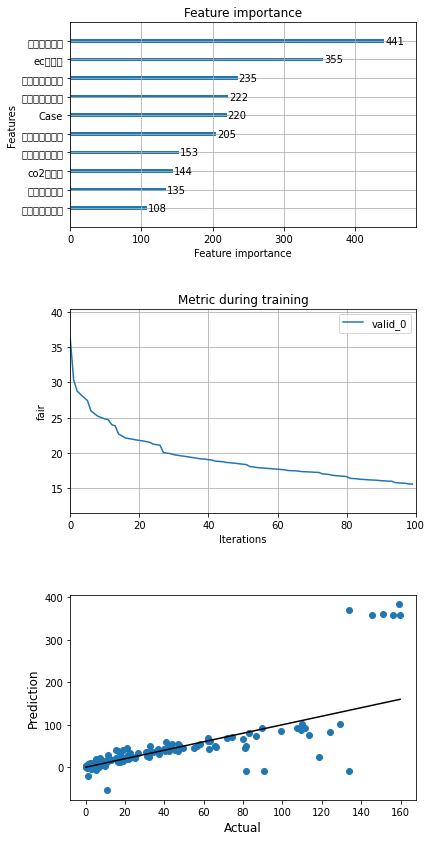

Features Importance Split & Gain...
    feature  split       gain
2   내부온도관측치    205  25.549958
7   시간당백색광량    153  16.516389
8   시간당적색광량    235  14.251440
5     ec관측치    355  14.075436
6    시간당분무량    441  12.134507
4    co2관측치    144   4.840277
1      Case    220   4.073667
3   내부습도관측치    222   3.790530
10   시간당총광량    135   2.319647
0       DAT    100   1.816200
9   시간당청색광량    108   0.631949
MAE: 97976792787120869959711763013940056230786912443786017878172788396093296647394054774207599994449220073662307924660525251504972837417674317669935021805886857080209408.000, MSE:    inf, RMSE:    inf


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


In [173]:
import matplotlib.pyplot as plt
def plot_results(model, evals_result, test_Y, pred_test_y):
    """
    학습된 모델(model)의 평가결과(evals_result)를 표시한다.
    """
    fig, axes = plt.subplots(3, figsize=(8,12))
    fig.subplots_adjust(hspace=.4)

    lgb.plot_importance(model, max_num_features=10, ax=axes[0])                 # 첫번째 그래프: 상위 10개의 피처 중요도

    lgb.plot_metric(evals_result, metric=METRIC, ax=axes[1])                    # 두번째 그래프: metric 측정 결과

    axe = axes[2]                                                               # 세번째 그래프: 실측치와 예측치의 상관도
    axe.scatter(test_Y, pred_test_y)
    axe.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='k')
    axe.set_xlabel('Actual', size=12)
    axe.set_ylabel('Prediction', size=12)

    plt.subplots_adjust(top=0.96, bottom=0.06, left=0.3)
    plt.show()

    print("Features Importance Split & Gain...")
    gain = model.feature_importance('gain')
    featureimp = pd.DataFrame({'feature':model.feature_name(), 
                    'split':model.feature_importance('split'), 
                    'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    print(featureimp[:50])
    return


#max_bin = tuning_max_bin(train_x,train_y)
train_x, train_y, val_x, val_y, tst_x, tst_y = load_spilit_train(train_x,train_y)

params = {'max_bin':2047, "verbose" : -1}                                    # warning 메시지를 표시하지 않도록 한다.
model, evals_result, fi, cv_preds = run_lgb(params, train_x, train_y, val_x, val_y, tst_x, tst_y)
plot_results(model, evals_result, tst_y, cv_preds['prediction'])

test_Y = np.expm1(tst_y)
pred_Y = np.expm1(cv_preds['prediction'])

MAE = mean_absolute_error(test_Y, pred_Y)
MSE = mean_squared_error(test_Y, pred_Y)
RMSE = np.sqrt(mean_squared_error(test_Y, pred_Y))

print(f"MAE: {MAE:6.3f}, MSE: {MSE:6.3f}, RMSE: {RMSE:6.3f}")

In [176]:
#max_bin = tuning_max_bin()
max_bin = 2047
#train_x, train_y = load_train()
train_x = save_train
test_x = svae_test
RepNo = 5                                                                     # 품목 갯수


pred_Y = model.predict(test_x)                                          # 두번째 부터는 학습된 모델로 추론만 한다.

predict['predicted_weight_g'] = pred_Y

test_target_path = '/content/drive/MyDrive/상추/test_target/*.csv'
all_target_list = sorted(glob.glob(test_target_path))

i=0
for test_path in all_target_list:
    submit_df = pd.read_csv(test_path)
    submit_df['predicted_weight_g'] = predict['predicted_weight_g'][i*28:i*28+28].values
    print(submit_df,i)
    submit_df.to_csv(test_path, index=False)
    i+=1

    DAT  predicted_weight_g
0     1            1.586217
1     2            1.532667
2     3            1.765668
3     4           -1.122647
4     5           -2.388947
5     6            9.591258
6     7            8.377445
7     8           -0.517700
8     9            4.380762
9    10            3.093411
10   11            7.440768
11   12           10.406772
12   13           16.544636
13   14           14.480500
14   15           20.400469
15   16           22.901854
16   17           32.242781
17   18           28.422598
18   19           30.067738
19   20           30.950042
20   21           35.943370
21   22           38.823700
22   23           50.233863
23   24           48.358921
24   25           68.006250
25   26          108.588201
26   27          118.523057
27   28          119.169410 0
    DAT  predicted_weight_g
0     1            1.549166
1     2            1.783523
2     3            1.412974
3     4            5.673309
4     5            8.827950
5     6           